In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

In [2]:
outcomes = pd.read_csv('data/london-outcomes.csv')

In [3]:
police = pd.read_csv('data/london-stop-and-search.csv')

C:\Users\Toluwalase\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
street = pd.read_csv('data/london-street.csv')

In [5]:
crime = pd.read_csv('data/london_crime_by_lsoa.csv')

In [6]:
police.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,False
1,Person search,2015-03-02T16:40:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,Asian or Asian British - Bangladeshi (A3),Asian,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
2,Person search,2015-03-02T18:45:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - Any other White ethnic background (W9),White,Police and Criminal Evidence Act 1984 (section 1),NaN,Suspect arrested,True,True
3,Person search,2015-03-02T19:15:00+00:00,NaN,NaN,NaN,NaN,Male,over 34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,False,False
4,Person and Vehicle search,2015-03-03T15:50:00+00:00,NaN,NaN,NaN,NaN,Male,25-34,White - White British (W1),White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Suspect arrested,True,True


In [7]:
outcomes.head()
outcomes.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
1947045,5186054ab0668f142d7cb79aec8376626c352d9c8db932...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.242173,51.446627,On or near IBSLEY GARDENS,E01004570,Wandsworth 023B,Suspect charged
1947046,34f05f2da82bb45753654fba55266fee64ed6deac58168...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.156772,51.442455,On or near HUNTER CLOSE,E01004545,Wandsworth 027B,Suspect charged
1947047,d53d0b9f8c8f4a75ef153a89d9b5e54a9a26ab99e82f8b...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.150844,51.474510,On or near RAWSON STREET,E01004563,Wandsworth 002C,Suspect charged
1947048,23cac61d3b0500a733a220664555305f337ac90a053993...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.174952,51.467217,On or near LAVENDER ROAD,E01004535,Wandsworth 007A,Investigation complete; no suspect identified
1947049,95b8f2a05ba8577a632ea3fb9a58b37eb3ea985678b215...,2017-05,Metropolitan Police Service,Metropolitan Police Service,-0.191829,51.447830,On or near LYDDEN GROVE,E01004493,Wandsworth 019A,Investigation complete; no suspect identified


In [8]:
street.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,324a40f7da5f81b2f6c96bc6fe3e300173782e3342f409...,2014-06,City of London Police,City of London Police,-0.113767,51.517372,On or near Stone Buildings,E01000914,Camden 028B,Vehicle crime,Investigation complete; no suspect identified,NaN
1,62dde92ceeb12755a8a95a2829048ce4796ba3cfb3f7c0...,2014-06,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Violence and sexual offences,Unable to prosecute suspect,NaN
2,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
4,NaN,2014-06,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN


In [9]:
crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [10]:
outcomes.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name'], axis=1, inplace=True)

In [29]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947050 entries, 0 to 1947049
Data columns (total 5 columns):
Month           object
Reported by     object
Falls within    object
Location        object
Outcome type    object
dtypes: object(5)
memory usage: 74.3+ MB


In [12]:
police.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [13]:
police.columns

Index(['Type', 'Date', 'Part of a policing operation', 'Policing operation',
       'Gender', 'Age range', 'Self-defined ethnicity',
       'Officer-defined ethnicity', 'Legislation', 'Object of search',
       'Outcome', 'Outcome linked to object of search',
       'Removal of more than just outer clothing'],
      dtype='object')

In [14]:
street.drop(['Crime ID', 'Longitude', 'Latitude', 'LSOA code', 'LSOA name', 'Context'], axis=1, inplace=True)
street.columns

Index(['Month', 'Reported by', 'Falls within', 'Location', 'Crime type',
       'Last outcome category'],
      dtype='object')

In [30]:
street['Month'].unique()

array(['2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11',
       '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05',
       '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
       '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05',
       '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11',
       '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05'],
      dtype=object)

In [25]:
street['Crime type'].value_counts(dropna=False)

Anti-social behaviour           708264
Violence and sexual offences    596107
Other theft                     333817
Vehicle crime                   262309
Burglary                        213125
Criminal damage and arson       184772
Shoplifting                     135780
Public order                    130653
Theft from the person           109168
Drugs                           106836
Robbery                          68920
Bicycle theft                    54649
Other crime                      29208
Possession of weapons            12871
Name: Crime type, dtype: int64

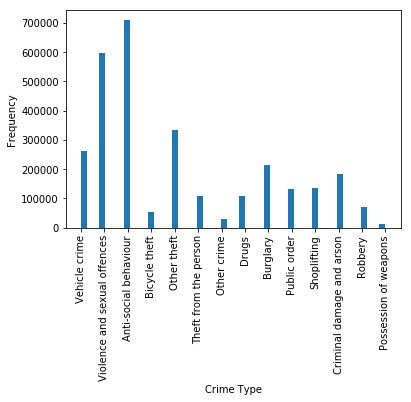

In [15]:
x = street['Crime type'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Crimes with the presence City of London Police")
plt.xticks(rotation='vertical')
plt.show()

In [17]:
crime['major_category'].value_counts(dropna=False)

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

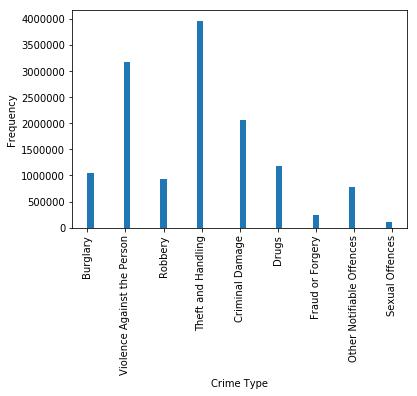

In [18]:
x = crime['major_category'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Crime Type")
plt.title("Different major crimes in Borough, London between 2008-2016")
plt.xticks(rotation='vertical')
plt.show()

In [28]:
crime['minor_category'].value_counts(dropna=False)

Other Theft                               522180
Theft From Motor Vehicle                  522180
Common Assault                            522180
Harassment                                522072
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

In [19]:
crime['borough'].value_counts(dropna=False)

Croydon                   602100
Barnet                    572832
Ealing                    549396
Bromley                   523908
Lambeth                   519048
Enfield                   511164
Wandsworth                498636
Brent                     490644
Lewisham                  485136
Southwark                 483300
Newham                    471420
Redbridge                 445716
Hillingdon                442584
Greenwich                 421200
Hackney                   417744
Haringey                  413856
Tower Hamlets             412128
Waltham Forest            406296
Havering                  399600
Hounslow                  395928
Bexley                    385668
Camden                    378432
Westminster               366660
Harrow                    365688
Islington                 359208
Merton                    339876
Hammersmith and Fulham    328752
Sutton                    322488
Barking and Dagenham      311040
Richmond upon Thames      304128
Kensington

In [24]:
crime['month'].value_counts(dropna=False)

12    1124217
11    1124217
10    1124217
9     1124217
8     1124217
7     1124217
6     1124217
5     1124217
4     1124217
3     1124217
2     1124217
1     1124217
Name: month, dtype: int64

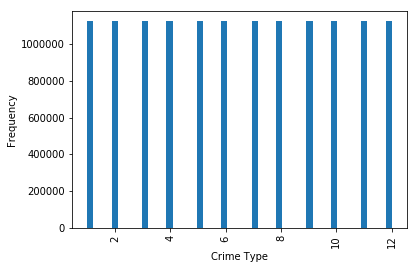

In [23]:
x = crime['month'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation='vertical')
plt.show()

In [22]:
crime.drop(['lsoa_code', 'value'], axis=1, inplace=True)
crime.columns

Index(['borough', 'major_category', 'minor_category', 'year', 'month'], dtype='object')

In [19]:
crime['year'].unique()

array([2016, 2015, 2008, 2012, 2010, 2013, 2014, 2011, 2009], dtype=int64)

In [26]:
crime['year'].value_counts()

2016    1498956
2015    1498956
2014    1498956
2013    1498956
2012    1498956
2011    1498956
2010    1498956
2009    1498956
2008    1498956
Name: year, dtype: int64

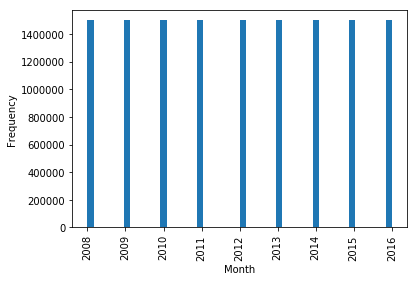

In [27]:
x = crime['year'].tolist()
plt.hist(x, bins=50)
plt.ylabel("Frequency")
plt.xlabel("Month")
plt.xticks(rotation='vertical')
plt.show()

In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 5 columns):
borough           object
major_category    object
minor_category    object
year              int64
month             int64
dtypes: int64(2), object(3)
memory usage: 514.6+ MB


In [22]:
isCrime08 = crime['year']==2008

In [23]:
crime08 = crime[isCrime08]

In [24]:
crime08.head()

,borough,major_category,minor_category,year,month
4,Wandsworth,Robbery,Personal Property,2008,6
33,Havering,Violence Against the Person,Harassment,2008,1
34,Hillingdon,Violence Against the Person,Offensive Weapon,2008,10
46,Westminster,Criminal Damage,Other Criminal Damage,2008,11
54,Bexley,Theft and Handling,Theft/Taking Of Motor Vehicle,2008,5


In [26]:
crime08['major_category'].value_counts()

Theft and Handling             440700
Violence Against the Person    352416
Criminal Damage                229908
Drugs                          131052
Burglary                       115956
Robbery                        104376
Other Notifiable Offences       86256
Fraud or Forgery                26280
Sexual Offences                 12012
Name: major_category, dtype: int64